## 데이이터 파일에 대한 설명
Team-M1~community-comments-csv 폴더에는 labeld 라는 파일이 있습니당.  
55000개 정도의 데이터와 0, 1, 2 라벨링이 되어있습니다. 0이 악플, 1이 일반 글 
  
preprocessing-for-gender~ 폴더에는 kokohub_labeld_data 가 있어요
8700개 정도 있어요.  
  
BM-K폴더에는 10000개의 데이터가 있어요.  
  
도합 약 73,000 데이터  

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

%matplotlib inline #notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것

#################################
import nltk
import re
import time
from nltk.tokenize import word_tokenize
import konlpy

UsageError: unrecognized arguments: #notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것


# Load Data & 다듬고 & 라벨링 & 데이터 합치기

## #228개의 욕 사전! 

In [2]:
data_path='./bow.csv'
data_bow=pd.read_csv(data_path, encoding='utf-8')
data_bow

,보짓물마셔
0,게가튼
1,졀라
2,따먹을까
3,뻑큐
4,개에거얼래
...,...
1987,씹탱
1988,씨방새
1989,십버지
1990,시미친발


## Team-M1에서 구한 33805개의 글과 라벨 0,1

In [32]:
data_path = './Team-M1~community-comments-csv/labeled.tsv'
data1 = pd.read_csv(data_path,sep='\t', encoding ='utf8')
data1

,content,0
0,이종석 한효주 나오는 드라마 이후로 드라마 안봤다. 2년전인가?? 좀 신선했었지. ...,1
1,씨바알..노무노무 술프노... 오늘 저녁은 꽂등심이다ㅠㅜ,0
2,짱깨 꺼라ㅡ패쓰,1
3,그들의 사생활 ~ 고인이된 설리를 위해서라도 모두 조용하길 지금 누굴 탓한다고 무슨...,1
4,아무리 법이 뭣같아도 무슨 자격으로 개인의 신상정보를 불특정 다수에게 공개하는지 도...,1
...,...,...
33800,느그랑 해명도 없이 그냥 사과문만 올린 이유가,1
33801,지금 씨제이가 스엠 먹는 기사들 때문에 탈퇴 기사를 굳이 안쓰는거긔 오늘 나올 음원...,1
33802,그리고 뒷담깐건 주작이야,1
33803,쐭스 사진도 주작입니다,1


In [33]:
data1.columns

Index(['content', '0'], dtype='object')

In [34]:
data1.columns = ['content','label']

In [35]:
data1

,content,label
0,이종석 한효주 나오는 드라마 이후로 드라마 안봤다. 2년전인가?? 좀 신선했었지. ...,1
1,씨바알..노무노무 술프노... 오늘 저녁은 꽂등심이다ㅠㅜ,0
2,짱깨 꺼라ㅡ패쓰,1
3,그들의 사생활 ~ 고인이된 설리를 위해서라도 모두 조용하길 지금 누굴 탓한다고 무슨...,1
4,아무리 법이 뭣같아도 무슨 자격으로 개인의 신상정보를 불특정 다수에게 공개하는지 도...,1
...,...,...
33800,느그랑 해명도 없이 그냥 사과문만 올린 이유가,1
33801,지금 씨제이가 스엠 먹는 기사들 때문에 탈퇴 기사를 굳이 안쓰는거긔 오늘 나올 음원...,1
33802,그리고 뒷담깐건 주작이야,1
33803,쐭스 사진도 주작입니다,1


<AxesSubplot:xlabel='label', ylabel='count'>

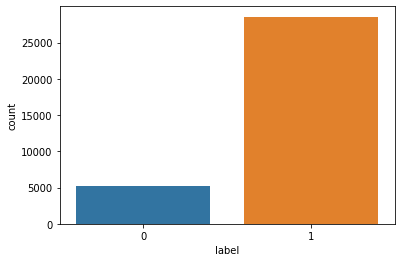

In [36]:
sns.countplot(x = 'label', data = data1)

## BM-K의 10000개 데이터

In [43]:
data_path='./BM-K/500lines_test.tsv'
data_labeled3_500test=pd.read_csv(data_path,sep='\t', encoding='utf-8')

data_path='./BM-K/500lines_val.tsv'
data_labeled3_500val=pd.read_csv(data_path, sep='\t', encoding='utf-8')

data_path='./BM-K/9000lines.tsv'
data_labeled3_9000=pd.read_csv(data_path, sep='\t', encoding='utf-8')

In [44]:
data_labeled3_500test

,content,label
0,최정훈님의 마음이 담긴글을 읽고 마음이참아프네요~여러추측기사들이~참속상하네요~저처럼...,1
1,빤스바람 ㅋㅋ 혜교언니는 그때도 이쁘시던데!,1
2,자연미인도 아닌게... 네이버일마들 자꾸 띄우는겨? 지겹네 아오~~,0
3,이런 훌륭한 사람은 KBS프로에서 많이 소개되야한다. 연예인들이 쓸데없이 먹고 노는...,1
4,스윙스 나올때는 잼던데 ㅋㅋㅋ,1
...,...,...
495,이거 보다 더한 막장의 드라마도 넋놓고 보면서 무슨?,1
496,머...제네시스..올라프에디션?,1
497,항상 여자로 ㅡ ㅡ 저지랄 들이야 남자들 벗겨봐라,0
498,첫번째 이유가 ㄹㅇ 맞지특히나 뉴스나 기사 몇줄읽은 학생들끼리 대화해도 서로 존나 ...,0


In [45]:
data_labeled3_500val

,content,label
0,연예인 귀싸대기 때릴 외모에 아나운서의 부티가 묻어나네.... 대박 존예네... 개부럽,1
1,진짜다 게이야,0
2,존만한색기,0
3,백종원 남재현 이휘재 고지용이나 디지지,0
4,니가 살찌는건 쳐먹고 운동을 안해서지,0
...,...,...
495,안녕하세요.. 다들 좋은아침입니다.. 이 글 보신 모든분들 오늘 한주의 시작인 월요...,1
496,솔직히 클라라 비주얼 대한민국 최상위급이지,1
497,이동건 차예련 핑크빛 열애중 ㅡ벌써 십년전이네 세월참 빠르긴 하네 ㅡㅡ,1
498,아무리 둘이 행복해보여도 애가 없어서 그런지 어딘가 허전해보이는데....? 아무리 ...,1


## preprocessing~ 의 8366데이터

In [46]:
data_path='./preprocessing-for-gender~/hate_speech_refined.tsv'
data2=pd.read_csv(data_path,sep='\t', encoding='utf-8')

In [47]:
data2

,content,label
0,걍 이 병신나라 민도가 좆박은건데 어쩔수가 잇나 걍 망해야지,0
1,그 앰생 쓰레기 병신들은 짐승이고. 니는 짐승을 사람 취급해주냐.,0
2,제발 너그집으로 꺼져 애미뒤진새끼야,0
3,몸만지면 대주는 걸레년임,0
4,환경오염도 이쯤되면 심각하고 자식 낳아봐야 지들 애미애비(그러므로 너 나 우리)가 ...,0
...,...,...
5389,예서는 멘탈이 약한 아이입니다~ 잘 케어 해 주십쇼~!,1
5390,예서는 못생겼는데 못됐고 혜나는 예쁜데 못됐고 둘다 연기 잘하지만 내게는 그차이,1
5391,예술가들의 아름다운 사랑 응원합니다,1
5392,예원 진짜 이뿌다. 노래도 넘 잘불러서 깜놀했다. 예능에서 자주 봤으면 좋겠다.,1


In [48]:
data_path='./preprocessing-for-gender~/kocohub_labeled_data.tsv'
data3=pd.read_csv(data_path,sep='\t', encoding='utf-8')

In [49]:
data3

,content,label
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,0
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,1
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",0
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",1
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,0
...,...,...
8362,지현우 범죄 저지르지 않았나요?,0
8363,여자인생 망칠 일 있나 ㅋㅋ,0
8364,근데 전라도에서 사고가 났는데 굳이 서울까지 와서 병원에 가느 이유는?,0
8365,"할매젖x, 뱃살x, 몸매 s라인, 유륜은 적당해야됨(너무크거나 너무 작아도 x), ...",0


# 데이터 합치기

In [63]:
data = pd.DataFrame(data=data1)
data

,content,label
0,이종석 한효주 나오는 드라마 이후로 드라마 안봤다. 2년전인가?? 좀 신선했었지. ...,1
1,씨바알..노무노무 술프노... 오늘 저녁은 꽂등심이다ㅠㅜ,0
2,짱깨 꺼라ㅡ패쓰,1
3,그들의 사생활 ~ 고인이된 설리를 위해서라도 모두 조용하길 지금 누굴 탓한다고 무슨...,1
4,아무리 법이 뭣같아도 무슨 자격으로 개인의 신상정보를 불특정 다수에게 공개하는지 도...,1
...,...,...
33800,느그랑 해명도 없이 그냥 사과문만 올린 이유가,1
33801,지금 씨제이가 스엠 먹는 기사들 때문에 탈퇴 기사를 굳이 안쓰는거긔 오늘 나올 음원...,1
33802,그리고 뒷담깐건 주작이야,1
33803,쐭스 사진도 주작입니다,1


In [64]:
data = data.append(data2, ignore_index=True)
data = data.append(data3, ignore_index=True)
data = data.append(data_labeled3_500test, ignore_index=True)
data = data.append(data_labeled3_500val, ignore_index=True)
data = data.append(data_labeled3_9000, ignore_index=True)
data

,content,label
0,이종석 한효주 나오는 드라마 이후로 드라마 안봤다. 2년전인가?? 좀 신선했었지. ...,1
1,씨바알..노무노무 술프노... 오늘 저녁은 꽂등심이다ㅠㅜ,0
2,짱깨 꺼라ㅡ패쓰,1
3,그들의 사생활 ~ 고인이된 설리를 위해서라도 모두 조용하길 지금 누굴 탓한다고 무슨...,1
4,아무리 법이 뭣같아도 무슨 자격으로 개인의 신상정보를 불특정 다수에게 공개하는지 도...,1
...,...,...
57561,니가 누구랑 사귀든 관심 없다 병신년아 얼굴에 주사맞은년이 ㅋㅋ 에휴 역겨워,0
57562,다른 멤버들은 뭔 죄냐 ㅋㅋ,1
57563,정말 잘 돌리겠다. 왕새우에 올라가 꽆고 좌회전우회전.,0
57564,대체 이걸 왜 알아야하지?기레기야 그렇게 할일이 없냐?,0


## data를 tsv파일로

In [65]:
data.to_csv('./all_data.tsv', sep='\t', index=False)